# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 596


In [9]:

#cities=['Chicago','Detroit']
cities





['waitangi',
 'puerto natales',
 'goz beida',
 'punta arenas',
 'vorgashor',
 'west island',
 'wailua homesteads',
 'bujaru',
 'san julian',
 'codrington',
 'karachi',
 'grytviken',
 'puerto baquerizo moreno',
 'swakopmund',
 'port-aux-francais',
 'pingzhuang',
 'kodiak',
 'ushuaia',
 'papatowai',
 'alo',
 'baganga',
 'bilibino',
 'chipata',
 'chinde',
 'taiohae',
 'margaret river',
 'adamstown',
 'jieshi',
 'fort mcmurray',
 'feijo',
 'blackmans bay',
 'cedeira',
 'atafu village',
 'kirakira',
 'invercargill',
 'old orchard beach',
 'ilulissat',
 'santa cruz',
 'bethel',
 'acarau',
 'mount pearl',
 'san clemente del tuyu',
 'ulladulla',
 'jamestown',
 'petropavlovsk-kamchatsky',
 'kerikeri',
 'hammerfest',
 'luderitz',
 'yellowknife',
 'berezovyy',
 'botshabelo',
 'san patricio',
 'murzuq',
 'sitka',
 'hami',
 'praia',
 'tobi village',
 'nueva palestina',
 'marinette',
 'port elizabeth',
 'kuraymah',
 'aykhal',
 'salym',
 'lompoc',
 'pasuquin',
 'isafjordur',
 'hobyo',
 'tabou',
 'for

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sodankyla
Processing Record 2 of Set 1 | sambava
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | kurchatov
Processing Record 5 of Set 1 | balaklava
Processing Record 6 of Set 1 | lospalos
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | columbus
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | singa
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | tsiombe
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | constantia
Processing Record 40 of Set 4 | chonchi
Processing Record 41 of Set 4 | renk
City not found. Skipping...
Processing Record 42 of Set 4 | uturoa
Processing Record 43 of Set 4 | labasa
Processing Record 44 of Set 4 | bandundu
Processing Record 45 of Set 4 | kosh-agach
Processing Record 46 of Set 4 | langtoucun
Processing Record 47 of Set 4 | enriquillo
Processing Record 48 of Set 4 | primero de mayo
Processing Record 49 of Set 4 | wailua homesteads
Processing Record 0 of Set 5 | thief river falls
Processing Record 1 of Set 5 | vyazemskiy
Processing Record 2 of Set 5 | halifax
Processing Record 3 of Set 5 | el calafate
Processing Record 4 of Set 5 | kasongo
Processing Record 5 of Set 5 | kharp
Processing Record 6 of Set 5 | richlands
Processing Record 7 of Set 5 | acarau
Processing Record 8 of Set 5 | port alfred
Processing Record 9 of Set 5 | that phanom
Processing Record 10 of Set 5 | portland
Processing Record 11 of Set 5 | konstantinovka
Proc

Processing Record 25 of Set 8 | jijiga
Processing Record 26 of Set 8 | general pico
Processing Record 27 of Set 8 | ketchikan
Processing Record 28 of Set 8 | sebezh
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | tumayr
Processing Record 31 of Set 8 | oroqen zizhiqi
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | kamaishi
Processing Record 34 of Set 8 | san felipe
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | kayyerkan
Processing Record 37 of Set 8 | casas grandes
Processing Record 38 of Set 8 | usak
Processing Record 39 of Set 8 | vila do maio
Processing Record 40 of Set 8 | puerto baquerizo moreno
Processing Record 41 of Set 8 | kismayo
Processing Record 42 of Set 8 | usinsk
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | kostanay
Processing Record 45 of Set 8 | luanda
Processing Record 46 of Set 8 | dar naim
City not found. Skipping...
Processing Record 47 of Set 8 | morant bay
Processin

Processing Record 17 of Set 12 | remire-montjoly
Processing Record 18 of Set 12 | guiratinga
Processing Record 19 of Set 12 | extrema
Processing Record 20 of Set 12 | ojinaga
Processing Record 21 of Set 12 | dalandzadgad
Processing Record 22 of Set 12 | yagry
City not found. Skipping...
Processing Record 23 of Set 12 | saint-raphael
Processing Record 24 of Set 12 | mejit
Processing Record 25 of Set 12 | katsuura
Processing Record 26 of Set 12 | prado
Processing Record 27 of Set 12 | hithadhoo
Processing Record 28 of Set 12 | sao joao da barra
Processing Record 29 of Set 12 | kulia village
City not found. Skipping...
Processing Record 30 of Set 12 | mount isa
Processing Record 31 of Set 12 | nouna
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | chicxulub puerto
City not found. Skipping...
Processing Record 34 of Set 12 | verkhniy mamon
Processing Record 35 of Set 12 | padangsidempuan
Processing Record 36 of Set 12 | ebon
Processing Record 37 of Set 12 | pemala

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [51]:
# Display sample data
city_data_df.head() 


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,sodankyla,67.4167,26.6000,8.45,74,32,3.06,FI,1696167494
1,1,sambava,-14.2667,50.1667,25.24,74,51,3.51,MG,1696167495
2,2,grytviken,-54.2811,-36.5092,4.63,84,57,4.14,GS,1696167495
3,3,kurchatov,51.6601,35.6521,22.23,36,53,4.94,RU,1696167431
4,4,balaklava,44.5000,33.6000,21.66,51,97,3.19,UA,1696167495


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,sodankyla,67.4167,26.6000,8.45,74,32,3.06,FI,1696167494
1,1,sambava,-14.2667,50.1667,25.24,74,51,3.51,MG,1696167495
2,2,grytviken,-54.2811,-36.5092,4.63,84,57,4.14,GS,1696167495
3,3,kurchatov,51.6601,35.6521,22.23,36,53,4.94,RU,1696167431
4,4,balaklava,44.5000,33.6000,21.66,51,97,3.19,UA,1696167495


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

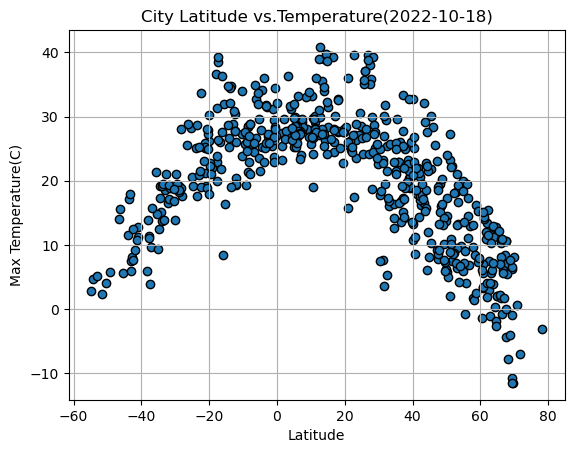

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig111.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

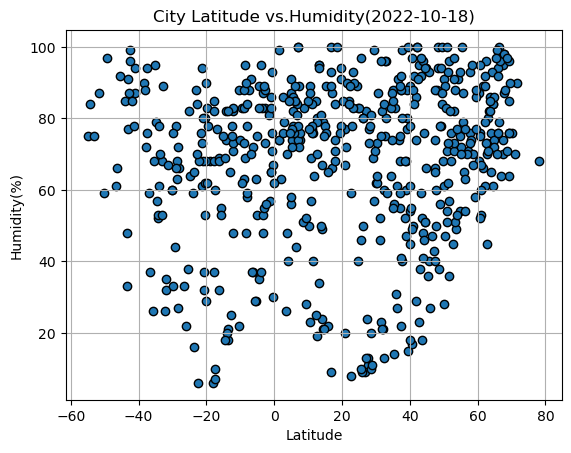

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig222.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

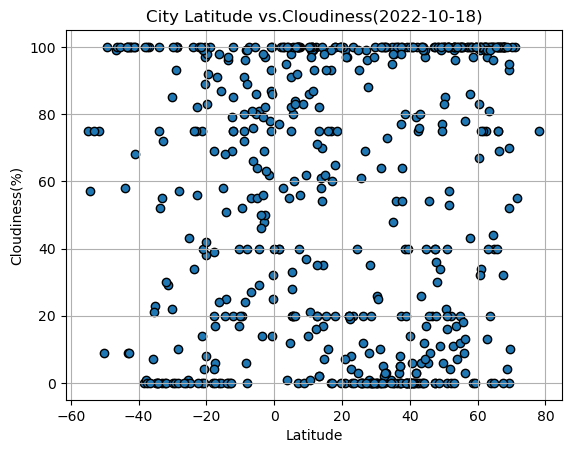

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig333.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

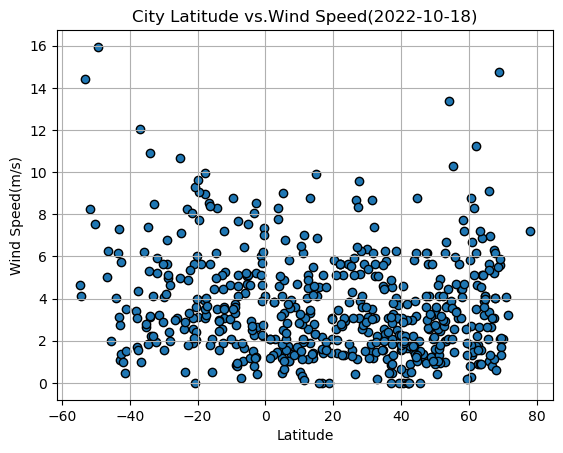

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig444.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,sodankyla,67.4167,26.6000,8.45,74,32,3.06,FI,1696167494
3,3,kurchatov,51.6601,35.6521,22.23,36,53,4.94,RU,1696167431
4,4,balaklava,44.5000,33.6000,21.66,51,97,3.19,UA,1696167495
6,6,fortuna,40.5982,-124.1573,8.51,97,100,0.00,US,1696167496
11,11,columbus,39.9612,-82.9988,20.80,89,0,1.54,US,1696167374


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,1,sambava,-14.2667,50.1667,25.24,74,51,3.51,MG,1696167495
2,2,grytviken,-54.2811,-36.5092,4.63,84,57,4.14,GS,1696167495
5,5,lospalos,-8.5186,127.0025,21.30,95,24,1.84,TL,1696167495
7,7,kavieng,-2.5744,150.7967,27.05,83,97,2.64,PG,1696167496
8,8,atafu village,-8.5421,-172.5159,28.35,69,96,0.84,TK,1696167496


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.81


Text(0, 0.5, 'Temperature(C)')

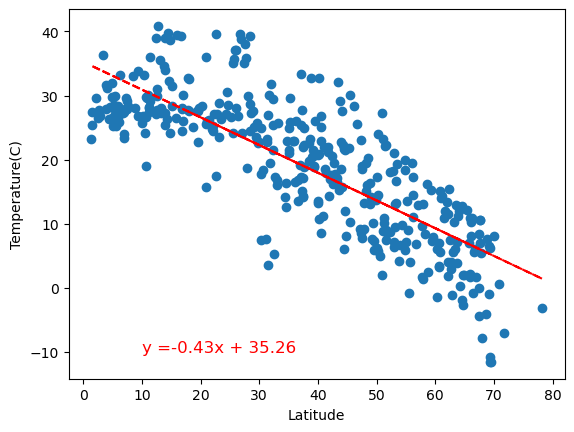

In [24]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.78


Text(0, 0.5, 'Temperature(C)')

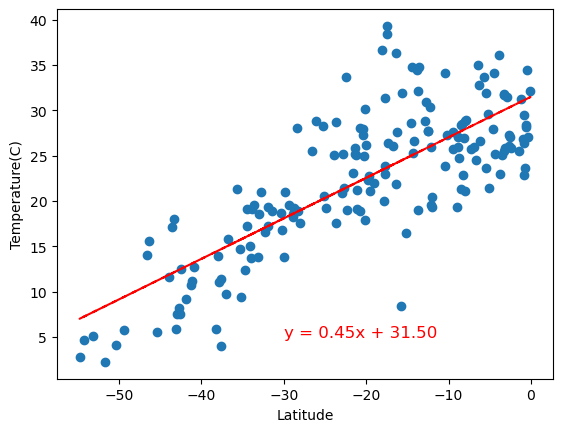

In [25]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)') 

**Discussion about the linear relationship:** 

- The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the temparature also increases
- As we move away from the equator, the max temperature decreases.


### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.14


Text(0, 0.5, 'Humidity(%)')

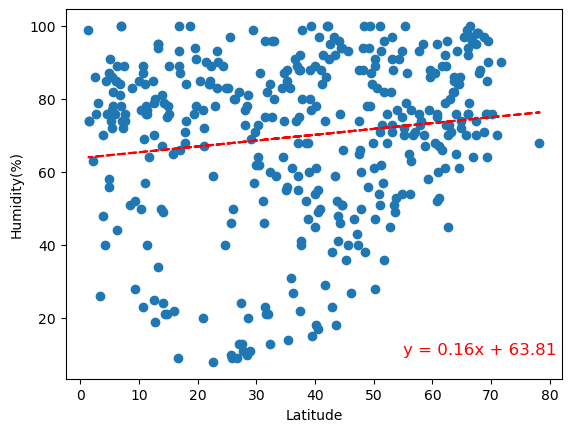

In [26]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is -0.08


Text(0, 0.5, 'Humidity(%)')

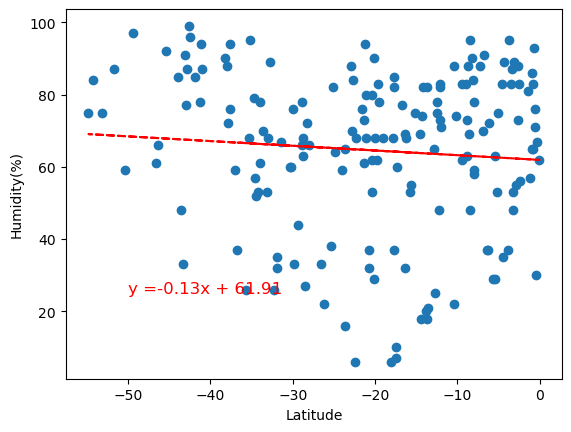

In [27]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** 

- In Northern hemisphere as latitude increases temparature rises from 60 to 80%. 
- In Southern hemisphere as latitude increases temparature slightly plumments from 65 to 60percentage



### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.1


Text(0, 0.5, 'Cloudiness(%)')

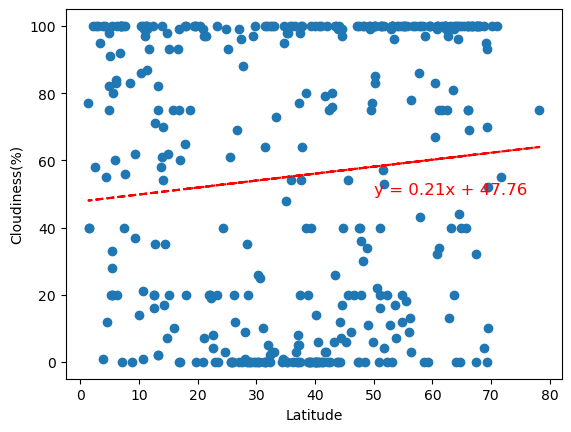

In [28]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')


The r-value between Lat and Cloudiness is 0.03


Text(0, 0.5, 'Cloudiness(%)')

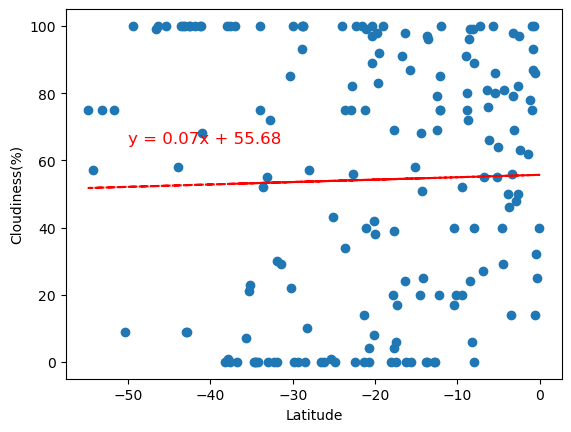

In [29]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** 

- The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.09


Text(0, 0.5, 'Wind Speed(m/s)')

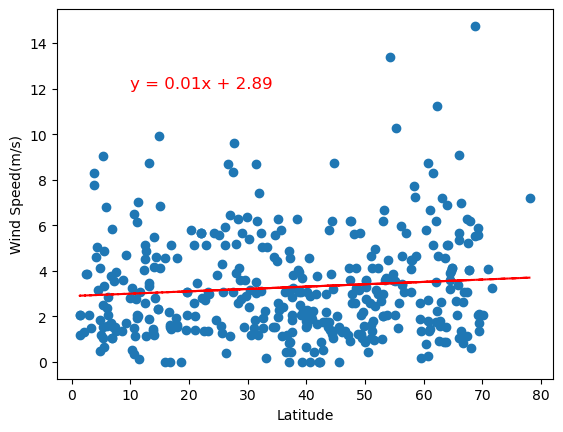

In [30]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.15


Text(0, 0.5, 'Wind Speed(m/s)')

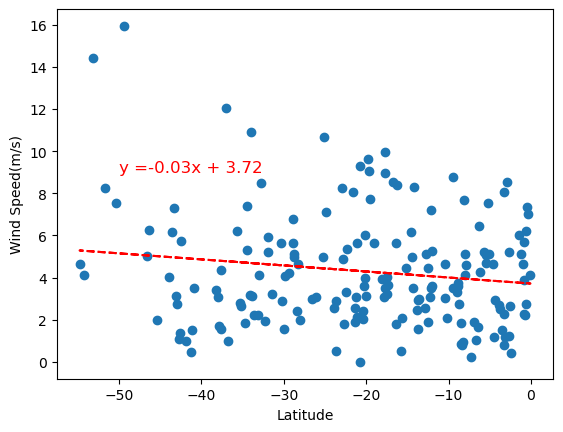

In [31]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** 

- In northern hemisphere, a city's latitude and wind speed have no coorelation(0.00) - that is to say a city's windy level does not much related to its latitude, in southern hemisphere, it is a similar situation  with very minor negative coorelation(-0.17) between city's latitude and wind speed.
